<div style="border-radius: 30px 0 30px 0px; border: 2px solid #00ea98; padding: 20px; background-color: #0a141b; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2); width: 60%; margin: auto;">
    <h1 style="color: #7ab052; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">🌶️🍃 Pepper Leaf  Desease Classification</h1>
</div>


<img src="https://img.freepik.com/premium-photo/thriving-indoor-red-pepper-plant-purposeful-garden_1092689-8538.jpg" alt="AI Generated Image" width="1500" height = 500/>

In [1]:
!pip install mplcursors

<div style="border-radius: 30px 0 30px 0px; border: 2px solid #00ea98; padding: 20px; background-color: #0a141b; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2); width: 60%; margin: auto;">
    <h1 style="color: #7ab052; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px;">Importing The Libraries</h1>
</div>

In [32]:
from tensorflow.keras.applications import DenseNet121, EfficientNetB4, Xception, VGG16, VGG19
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D, AveragePooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.optimizers import Adam, RMSprop
import tensorflow as tf
import mplcursors
from tensorflow.keras import models, layers
from tensorflow.keras import Sequential, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
import numpy as np
import os
import shutil
from collections import Counter
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings('ignore')

<div style="border-radius: 30px 0 30px 0px; border: 2px solid #00ea98; padding: 20px; background-color: #0a141b; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2); width: 60%; margin: auto;">
    <h1 style="color: #7ab052; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px;">Evaluation Plotter</h1>
</div>

In [3]:
def plot_plots(data):
    plt.style.use('dark_background')

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    ax1.plot(data['loss'], color='cyan', linewidth=2, label='Training Loss')
    ax1.plot(data['val_loss'], color='magenta', linewidth=2, label='Validation Loss')
    ax1.set_xlabel('Epochs', color='white')
    ax1.set_ylabel('Loss', color='white')
    ax1.set_title('Loss Over Epochs', color='white')
    ax1.tick_params(axis='y', colors='white')
    ax1.legend(loc='upper right', facecolor='black', edgecolor='white', fontsize=10)
    ax1.grid(color='gray', linestyle='--', linewidth=0.5)
    mplcursors.cursor(ax1, hover=True)

    ax2.plot(data['accuracy'], color='lime', linewidth=2, label='Training Accuracy')
    ax2.plot(data['val_accuracy'], color='orange', linewidth=2, label='Validation Accuracy')
    ax2.set_xlabel('Epochs', color='white')
    ax2.set_ylabel('Accuracy', color='white')
    ax2.set_title('Accuracy Over Epochs', color='white')
    ax2.tick_params(axis='y', colors='white')
    ax2.legend(loc='lower right', facecolor='black', edgecolor='white', fontsize=10)
    ax2.grid(color='gray', linestyle='--', linewidth=0.5)
    mplcursors.cursor(ax2, hover=True)

    plt.tight_layout()
    plt.show()

<div style="border-radius: 30px 0 30px 0px; border: 2px solid #00ea98; padding: 20px; background-color: #0a141b; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2); width: 60%; margin: auto;">
    <h1 style="color: #7ab052; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px;">Download Dataset from ==> <a href = "https://www.kaggle.com/datasets/arjuntejaswi/plant-village"> Kaggle </a><br></h1>
</div>

In [4]:
!unzip Pepper.zip -d Pepper

Archive:  Pepper.zip
   creating: Pepper/Pepper/
   creating: Pepper/Pepper/Pepper__bell___Bacterial_spot/
  inflating: Pepper/Pepper/Pepper__bell___Bacterial_spot/0022d6b7-d47c-4ee2-ae9a-392a53f48647___JR_B.Spot 8964.JPG  
  inflating: Pepper/Pepper/Pepper__bell___Bacterial_spot/006adb74-934f-448f-a14f-62181742127b___JR_B.Spot 3395.JPG  
  inflating: Pepper/Pepper/Pepper__bell___Bacterial_spot/00f2e69a-1e56-412d-8a79-fdce794a17e4___JR_B.Spot 3132.JPG  
  inflating: Pepper/Pepper/Pepper__bell___Bacterial_spot/01613cd0-d3cd-4e96-945c-a312002037bf___JR_B.Spot 3262.JPG  
  inflating: Pepper/Pepper/Pepper__bell___Bacterial_spot/0169b9ac-07b9-4be1-8b85-da94481f05a4___NREC_B.Spot 9169.JPG  
  inflating: Pepper/Pepper/Pepper__bell___Bacterial_spot/018e494e-d2eb-468b-9d02-40219d9f4921___JR_B.Spot 9045.JPG  
  inflating: Pepper/Pepper/Pepper__bell___Bacterial_spot/01940b6d-7dea-4889-a7b8-a35f4e9bba34___NREC_B.Spot 9120.JPG  
  inflating: Pepper/Pepper/Pepper__bell___Bacterial_spot/01dfb88b-cd5a

## **Spliting Training, Testing and Validation data**

In [5]:
source_dir = '/content/Pepper/Pepper'
base_dir = '/content/Pepper_Split'
os.makedirs(base_dir, exist_ok=True)

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

for folder in ['train', 'val', 'test']:
    for class_name in os.listdir(source_dir):
        os.makedirs(os.path.join(base_dir, folder, class_name), exist_ok=True)

for class_name in os.listdir(source_dir):
    class_dir = os.path.join(source_dir, class_name)
    images = os.listdir(class_dir)

    train_images, temp_images = train_test_split(images, test_size=0.09, random_state=42)
    val_images, test_images = train_test_split(temp_images, test_size=0.5, random_state=42)

    for img in train_images:
        shutil.copy(os.path.join(class_dir, img), os.path.join(train_dir, class_name, img))
    for img in val_images:
        shutil.copy(os.path.join(class_dir, img), os.path.join(val_dir, class_name, img))
    for img in test_images:
        shutil.copy(os.path.join(class_dir, img), os.path.join(test_dir, class_name, img))

## **Into Different Folders**

In [6]:
for folder in ['train', 'val', 'test']:
    folder_path = os.path.join(base_dir, folder)
    total_images = sum([len(files) for _, _, files in os.walk(folder_path)])
    print(f"Total images in {folder}: {total_images}")

Total images in train: 2251
Total images in val: 112
Total images in test: 112


<div style="border-radius: 30px 0 30px 0px; border: 2px solid #00ea98; padding: 20px; background-color: #0a141b; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);width: 60%; margin: auto;">
    <h1 style="color: #7ab052; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px;">Loading The DataSet</h1>
</div>

**WORKING**
- The `image_dataset_from_directory` function is used to load image data from a directory.
- Images are resized to 256x256 pixels and grouped into batches of 32 for training efficiency.
- Labels are inferred from the directory structure and represented in a categorical format.
- Pixel values of the images are normalized to a range of [0, 1] by dividing by 255.0.

In [7]:
train_data = tf.keras.utils.image_dataset_from_directory(
    '/content/Pepper_Split/train',
    labels='inferred',
    label_mode='int',
    image_size=(256, 256),
    batch_size=32
)

Found 2251 files belonging to 2 classes.


In [8]:
class_names = train_data.class_names

In [9]:
class_names

['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy']

In [10]:
train_data = train_data.map(lambda x, y: (x / 255.0, y))

**WORKING**
- The image_dataset_from_directory function is used to load validation image data from a directory.
- Images are resized to 256x256 pixels and grouped into batches of 32 for efficient processing.
- Labels are inferred from the directory structure and represented in a categorical format.
- Pixel values of the images are normalized to a range of [0, 1] by dividing by 255.0 for consistent model training.

In [11]:
val_data = tf.keras.utils.image_dataset_from_directory(
    '/content/Pepper_Split/val',
    labels='inferred',
    label_mode='int',
    image_size=(256, 256),
    batch_size=32
    )
val_data = val_data.map(lambda x, y: (x / 255.0, y))

Found 112 files belonging to 2 classes.


**WORKING**
- The image_dataset_from_directory function is used to load testing image data from a directory.
- Images are resized to 256x256 pixels and grouped into batches of 32 for efficient processing.
- Labels are inferred from the directory structure and represented in a categorical format.
- Pixel values of the images are normalized to a range of [0, 1] by dividing by 255.0 for consistent model training.

In [23]:
test_data = tf.keras.utils.image_dataset_from_directory(
    '/content/Pepper_Split/test',
    labels='inferred',
    label_mode='int',
    image_size=(256, 256),
    batch_size=32
    )
test_data = test_data.map(lambda x, y: (x / 255.0, y))

Found 112 files belonging to 2 classes.


<div style="border-radius: 30px 0 30px 0px; border: 2px solid #00ea98; padding: 20px; background-color: #0a141b; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);width: 60%; margin: auto;">
    <h1 style="color: #7ab052; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px;">Visualizing The Data</h1>
</div>

In [13]:
def visualize_imgs(file_path):
    image_files = [f for f in os.listdir(file_path) if os.path.isfile(os.path.join(file_path, f))]
    class_label = os.path.basename(file_path)
    fig, axs = plt.subplots(1, 3, figsize=(13, 10))
    for i in range(3):
        image_file = image_files[i]
        img_path = os.path.join(file_path, image_file)
        img = mpimg.imread(img_path)
        ax = axs[i]
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(class_label)
    plt.tight_layout()
    plt.show()

In [14]:
os.listdir('/content/Pepper_Split/train')

['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy']

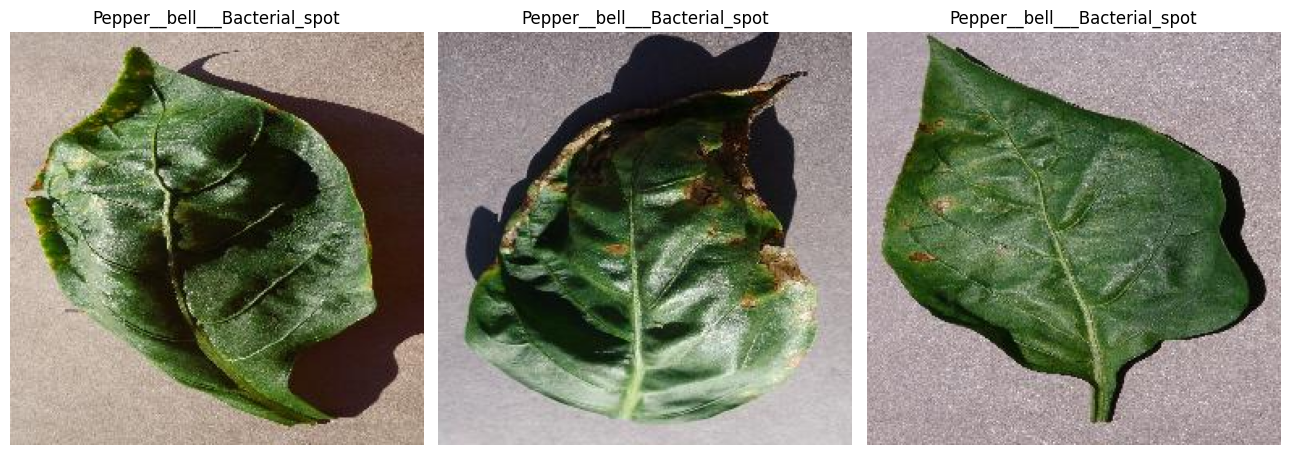

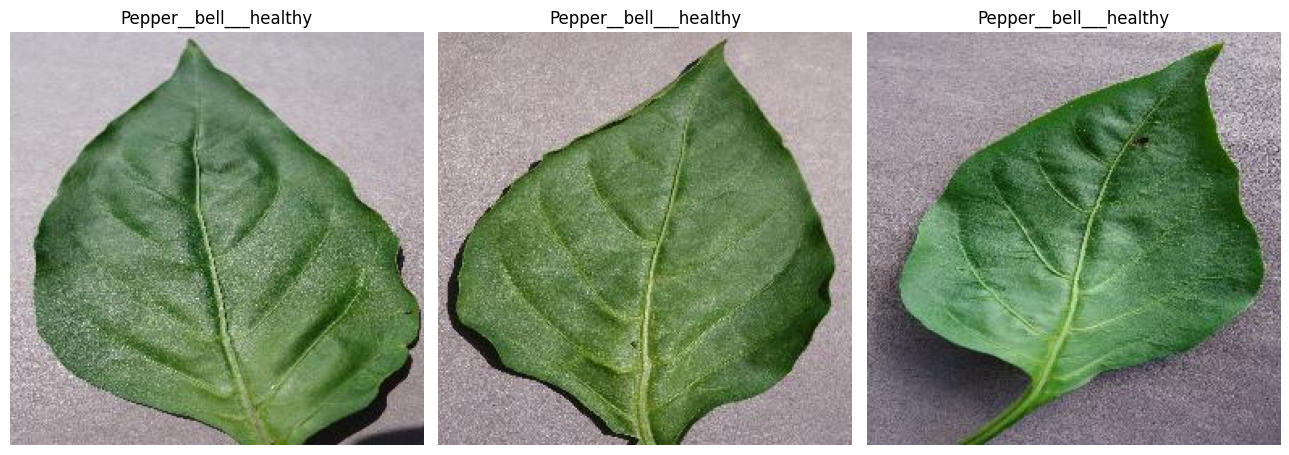

In [15]:
for i in os.listdir('/content/Pepper_Split/train'):
  visualize_imgs(f'/content/Pepper_Split/train/{i}')

**WORKING**
- The code initializes a `DenseNet121` model with weights pre-trained on the ImageNet dataset.
- The `include_top=False argument` specifies that the model should not include the fully connected layers at the top of the network, which are typically used for ImageNet classification.
- The `input_shape=(256,256,3) argument` specifies the shape of the input images that the model expects, which is `256x256` pixels with 3 channels (RGB).
- The initialized model `conv_base` can be used as a feature extractor to extract features from images, which can then be used as input to a custom classification head.

In [16]:
base_model = DenseNet121(
    weights='imagenet',
    include_top = False,
    input_shape=(256, 256, 3),
    pooling='avg'
)

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


**WHY FALSE ?**
- Setting conv_base.trainable = False freezes the weights of the pre-trained DenseNet121 model.
- This is done to prevent the weights from being updated during the training of the custom classification head.
- Freezing the pre-trained weights helps in utilizing the learned features from the ImageNet dataset without altering them.
- It also reduces the computational cost and training time, as only the weights of the custom classification head will be trained.

In [17]:
base_model.trainable = False

**WORKING**

- It initializes a Sequential model and adds the `pre-trained` DenseNet121` model (base_model) ` as the base.
- The model flattens the output from the base model and adds two fully connected layers with `ReLU activation`.
- `Batch normalization` is applied after each fully connected layer to improve training stability and speed.

In [18]:
model = Sequential()
model.add(base_model)
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.35))
model.add(BatchNormalization())
model.add(Dense(120, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

**WORKING**

- The compile method is used to configure the model for training.
- The optimizer=Adam(learning_rate=0.0001) argument specifies the Adam optimizer with a learning rate of 0.0001.
- The loss='categorical_crossentropy' argument specifies the loss function used for training, which is categorical crossentropy for multi-class classification.
- The metrics=['accuracy'] argument specifies the metric used to evaluate the model, which is accuracy in this case.

In [19]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [20]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

**WORKING**
- The `fit` method is used to train the model on the training data (`train_data`) for a specified number of epochs (100 in this case).
- The `validation_data=val_data` argument specifies the validation data to evaluate the model performance after each epoch.
- The `history` variable stores the training history, including metrics such as loss and accuracy, which can be used for analysis and visualization.

In [21]:
history = model.fit(train_data, epochs=15, validation_data=val_data)

Epoch 1/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 72s 600ms/step - accuracy: 0.7019 - loss: 0.5554 - val_accuracy: 0.9732 - val_loss: 0.3570
Epoch 2/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 30s 97ms/step - accuracy: 0.9419 - loss: 0.1861 - val_accuracy: 0.9732 - val_loss: 0.1956
Epoch 3/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 95ms/step - accuracy: 0.9699 - loss: 0.1175 - val_accuracy: 0.9821 - val_loss: 0.1195
Epoch 4/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 95ms/step - accuracy: 0.9862 - loss: 0.0674 - val_accuracy: 0.9821 - val_loss: 0.0785
Epoch 5/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 95ms/step - accuracy: 0.9897 - loss: 0.0562 - val_accuracy: 0.9911 - val_loss: 0.0560
Epoch 6/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 95ms/step - accuracy: 0.9857 - loss: 0.0538 - val_accuracy: 0.9911 - val_loss: 0.0404
Epoch 7/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - accuracy: 0.9855 - loss: 0.0507 - val_accuracy: 0.9911 - val_loss: 0.0331
Epoch 8/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - accuracy: 0.9916 - loss: 0.0370 - val_accuracy: 0.99

<div style="border-radius: 30px 0 30px 0px; border: 2px solid #00ea98; padding: 20px; background-color: #0a141b; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2); width: 60%; margin: auto;">
    <h1 style="color: #7ab052; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px;">Model Evaluation</div>

In [24]:
evaluate = model.evaluate(test_data)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 1.0000 - loss: 0.0230 


In [25]:
import pandas as pd
result_adam = pd.DataFrame(history.history)
result_adam.tail(5)

,accuracy,loss,val_accuracy,val_loss
10,0.995113,0.022509,0.991071,0.020615
11,0.995558,0.023197,1.000000,0.017345
12,0.997779,0.017158,1.000000,0.016781
13,0.996446,0.015595,0.991071,0.018196
14,0.997779,0.012223,1.000000,0.017191


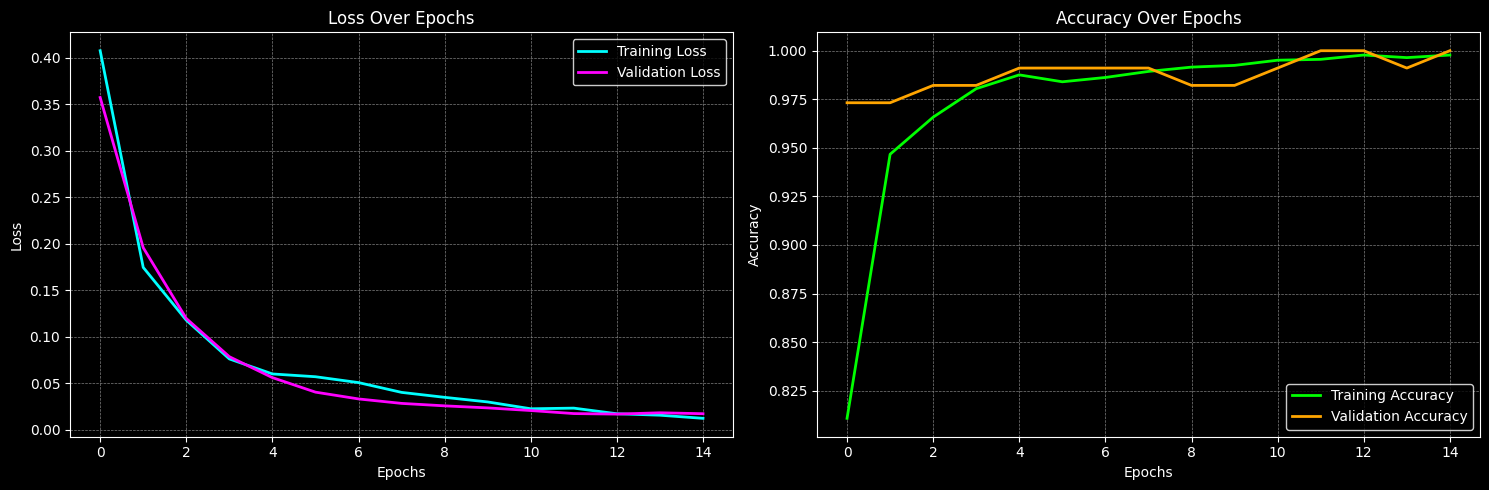

In [26]:
plot_plots(result_adam)


# **😌 Validation Accuracy 100.00%**:
  - Means that, when the model is evaluated on a separate set of data that it has not seen during training or validation, it correctly predicts the outcome 100.00% of the time. This is a good result and indicates that the model is performing well and generalizes well to new, unseen data.

In [37]:
print("Test data Loss:", evaluate[0])
print(f"Test data Accuracy: {evaluate[1]*100:.2f}%")

Test data Loss: 0.01876044273376465
Test data Accuracy: 100.00%


### **Confusion Matrix**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


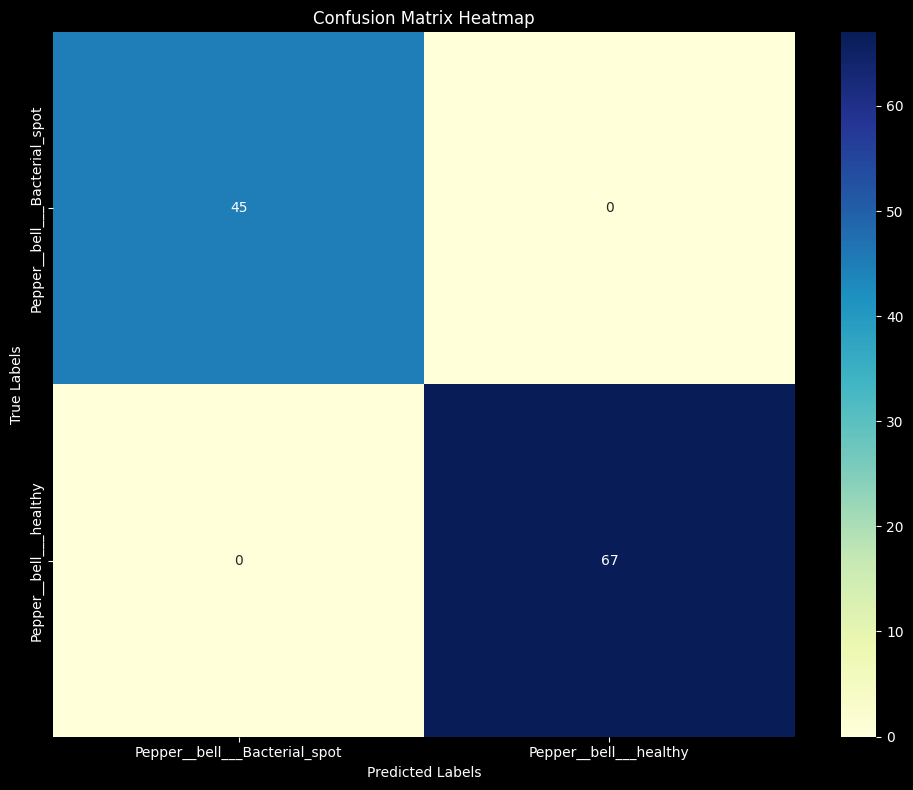

In [29]:
class_names = os.listdir('/content/Pepper_Split/test')

true_labels = []
predicted_labels = []
predicted_probs = []

for images, labels in val_data:
    preds = model.predict(images)
    predicted_probs.extend(preds.flatten())
    predicted_labels.extend((preds > 0.5).astype(int).flatten())
    true_labels.extend(labels.numpy().astype(int).flatten())

conf_matrix = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt='d',
    cmap='YlGnBu',
    xticklabels=class_names,
    yticklabels=class_names
)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()

### **Classification Report**

In [30]:
report = classification_report(true_labels, predicted_labels, target_names=class_names)
print(report)

                               precision    recall  f1-score   support

Pepper__bell___Bacterial_spot       1.00      1.00      1.00        45
       Pepper__bell___healthy       1.00      1.00      1.00        67

                     accuracy                           1.00       112
                    macro avg       1.00      1.00      1.00       112
                 weighted avg       1.00      1.00      1.00       112



<div style="border-radius: 30px 0 30px 0px; border: 2px solid #00ea98; padding: 20px; background-color: #0a141b; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2); width: 60%; margin: auto;">
    <h1 style="color: #7ab052; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px;">Save Model</div>

In [31]:
model.save('pepper_desease_classifier_v1.h5')

In [33]:
load_model = tf.keras.models.load_model('/content/pepper_desease_classifier_v1.h5')

In [34]:
img_path = "/content/Pepper_Split/test/Pepper__bell___Bacterial_spot/0495b4d4-66a4-438c-862d-c483f08e4a95___JR_B.Spot 3288.JPG"
img = load_img(img_path, target_size=(256, 256))
img_array = img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)
predictions = load_model.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


In [36]:
predicted_class_index = np.argmax(predictions, axis=1)[0]
predicted_class_name = class_names[predicted_class_index]
print(f"Predicted Class: {predicted_class_name}")

Predicted Class: Pepper__bell___Bacterial_spot
